There are two major intermidiate steps when solving chess problem:
1. Move Chess:

>> Objective: find the shortest path between 2 spots on a chess board

>> Motivation: Move Chess effectively

2. Capture Chess

>> Objective: capture as many pieces from the opponent within centain fullmoves

>> Motivation: Piece captures as one way of reward.


Today we focus on Move chess

# Load and Import Package

In [ ]:
!pip install --upgrade git+https://github.com/arjangroen/RLC.git 
!pip install python-chess  # Python-Chess is the Python Chess Package that handles the chess environment

  Cloning https://github.com/arjangroen/RLC.git to /tmp/pip-req-build-nth7uzvn
  Running command git clone -q https://github.com/arjangroen/RLC.git /tmp/pip-req-build-nth7uzvn
  Created wheel for RLC: filename=RLC-0.3-cp36-none-any.whl size=22566 sha256=27f404c1e69a7433735c758f452b730c179d31e767db3c22e93cebcb733450d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-gkwnzfx8/wheels/04/68/a5/cb835cd3d76a49de696a942739c71a56bfe66d0d8ea7b4b446
Successfully built RLC
  Found existing installation: RLC 0.3
    Uninstalling RLC-0.3:
      Successfully uninstalled RLC-0.3


In [ ]:
from RLC.move_chess.environment import Board
from RLC.move_chess.agent import Piece
from RLC.move_chess.learn import Reinforce
import inspect

In [ ]:
print(inspect.getsource(Reinforce)) # play episodes, train and evaluate value and policy function 

In [ ]:
print(inspect.getsource(Piece)) #choose agent, apply policy, set move rule

In [ ]:
print(inspect.getsource(Board)) # take step, render chess board

# Load Chess

In [ ]:
p = Piece(piece='king') # select a chess agent (knight, bishop or rook)
env = Board() # 8*8 chess board
r = Reinforce(p,env) 
env.render()
env.visual_board # S start position, F is terminate position

[['[S]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[F]', '[ ]', '[ ]']]

# No policy

In [ ]:
states, actions, rewards = r.play_episode(state = (0,0), 
               max_steps=1e3, 
               epsilon=0.1) # start from (0,0), and end at (7,5)
len(actions)

308

# Q learning 

In [ ]:
r.q_learning(n_episodes=2000,alpha=0.2,gamma=0.9)
states, actions, rewards = r.play_episode(state = (0,0), 
                                          max_steps=1e3, epsilon=0.1)
len(actions)

8

# Model-free

Action value function and policy function

In [ ]:
r.visualize_policy()

[['↘', '↘', '↓', '↗', '→', '→', '↘', '→'],
 ['↘', '↘', '↘', '↘', '↘', '→', '→', '↓'],
 ['↘', '↘', '↘', '↘', '↙', '↓', '↘', '↗'],
 ['→', '↘', '↘', '↘', '↙', '↘', '↓', '→'],
 ['↘', '→', '↘', '↘', '↘', '↘', '↘', '↓'],
 ['→', '↗', '→', '↘', '↘', '↘', '↓', '↙'],
 ['→', '↘', '↘', '→', '↘', '↓', '↙', '↙'],
 ['↗', '→', '→', '↗', '→', 'F', '←', '→']]


In [ ]:
r.agent.action_function[0,0]

array([-5.69502779, -5.69502674, -5.6947684 , -5.21674548, -5.21699368,
       -5.69502142, -5.6950091 , -5.69502165])

more detail

# Visualize the learning progress

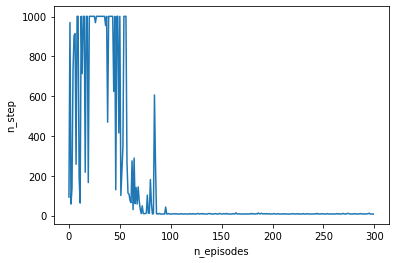

In [ ]:
p = Piece(piece='king') # select a chess agent (king, knight, bishop or rook)
env = Board() # 8*8 chess board
r = Reinforce(p,env) 
eva = [] # numnbe of step to get to desired position

for i in range(300):
  r.q_learning(n_episodes=1,alpha=0.2,gamma=0.9)
  states, actions, rewards = r.play_episode(state = (0,0), 
                                            max_steps=1e3, epsilon=0.1)
  eva.append(len(actions))
import matplotlib.pyplot as plt
plt.plot(eva)
plt.xlabel('n_episodes')
plt.ylabel('n_step')
plt.show()


# Algorithm

$Q(s, a) = Q(s, a) + \alpha (r + \gamma*max_{a'}Q(s' , a' )-Q(s, a))$

In [ ]:
def q_learning(self, n_episodes=1000, alpha=0.05, gamma=0.9):
        """
        Run Q-learning (also known as sarsa-max, finding the 
        optimal policy and value function
        :param n_episodes: int, amount of episodes to train
        :param alpha: learning rate
        :param gamma: discount factor of future rewards
        :return: finds the optimal move chess policy
        """
        for k in range(n_episodes):
            state = (0, 0)
            self.env.state = state
            episode_end = False
            epsilon = max(1 / (k + 1), 0.1)
            # action_function is the dict, since the chess board and 8*8 
            # and legal move are finite, the dict is finite. 
            #All action value(Q) is 0 now.
            while not episode_end:
                action_index = self.agent.apply_policy(state, epsilon)   
                # make action based on current policy
                action = self.agent.action_space[action_index]           
                # get current and previous state & 
                # action index (moving direction)
                reward, episode_end = self.env.step(action)
                successor_state = self.env.state                         
                successor_action_index = 
                self.agent.apply_policy(successor_state, -1) # max action value

                action_value = self.agent.action_function[state[0], 
                                                          state[1], 
                                                          action_index]
                if not episode_end:
                    successor_action_value = 
                    self.agent.action_function[successor_state[0],
                                               successor_state[1], 
                                               successor_action_index] 
                    # Search previous action(Q) value from dic
                else:
                    successor_action_value = 0

                av_new = self.agent.action_function[state[0], state[1], 
                                                    action_index] + 
                          alpha * (reward + 
                                   gamma * successor_action_value - 
                                   action_value)
                          
                # if not the final step, update the Q value
                self.agent.action_function[state[0], 
                                           state[1], 
                                           action_index] = av_new
                self.agent.policy = self.agent.action_function.copy()
                state = successor_state